# Writing data to and reading data from a Database using Python

## Libraries and settings

In [1]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Create sqlite data base

In [2]:
# Get current working directory
print(os.getcwd())

# Create data base
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

/Users/miroduman/Desktop/data analytics/Woche_2
apartment_database.db


## Create SQL-table in the database

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                                Rooms DECIMAL(8,2),
                                                                Area INT(8),
                                                                Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [4]:
df = pd.read_csv('apartments_data_prepared.csv', 
                  sep=',', 
                  encoding='utf-8')[['web-scraper-order', 'rooms', 'area', 'price']]
print(df.shape)
df.head(5)

(1008, 4)


,web-scraper-order,rooms,area,price
0,1662023695-433,3.5,122.0,3180.0
1,1662023745-820,2.5,78.0,3760.0
2,1662023742-807,5.5,115.0,2860.0
3,1662023804-1290,3.5,74.0,2165.0
4,1662023739-771,5.5,195.0,6900.0


## Write data to the SQL-table in data base

In [5]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

1008

## Query the SQL-table

In [6]:
# Query the SQL-table
cursor.execute('''SELECT * 
                FROM apartments_table 
                WHERE Rooms >= 3.0 
                AND Price > 1500''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Rooms','Area','Price'])    
print(df)

             OrderId  Rooms   Area   Price
0     1662023695-433    3.5  122.0  3180.0
1     1662023742-807    5.5  115.0  2860.0
2    1662023804-1290    3.5   74.0  2165.0
3     1662023739-771    5.5  195.0  6900.0
4     1662023686-384    3.0   75.0  3003.0
..               ...    ...    ...     ...
633   1662023730-697    3.0   68.0  1750.0
634   1662023714-580    3.0   64.0  2370.0
635   1662023749-858    5.5  123.0  2550.0
636  1662023783-1112    3.5   70.0  2190.0
637   1662023749-853    3.5   96.0  2260.0

[638 rows x 4 columns]


## Plot histogramm of rental prices

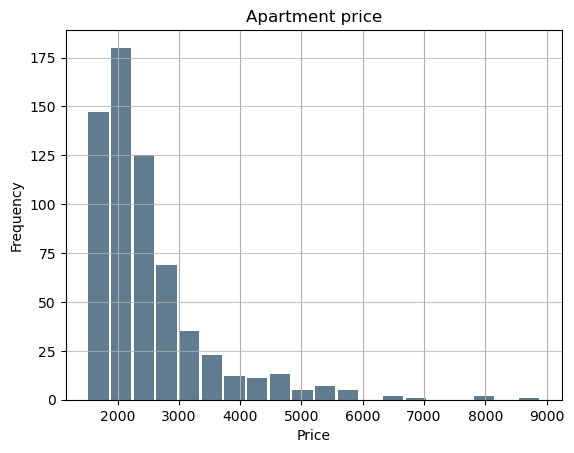

In [7]:
df.Price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

#conn.close()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [8]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 21.6.0
Datetime: 2022-09-30 16:23:06
Python Version: 3.9.13
-----------------------------------


### Additional SQL-queries

In [9]:
# Query the SQL-table
cursor.execute('''SELECT * 
                FROM apartments_table 
                WHERE Rooms >= 4.0 
                AND Area >= 100''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Rooms','Area','Price'])    
print(df)

             OrderId  Rooms   Area   Price
0     1662023742-807    5.5  115.0  2860.0
1     1662023739-771    5.5  195.0  6900.0
2     1662023727-685    4.5  124.0  4460.0
3     1662023730-704    4.5  100.0  1880.0
4     1662023689-402    4.5  109.0  2380.0
..               ...    ...    ...     ...
176  1662023813-1358    4.5  115.0  2580.0
177  1662023795-1213    4.5  117.0  2180.0
178  1662023786-1151    5.5  162.0  2210.0
179   1662023692-428    4.5  127.0  2820.0
180   1662023749-858    5.5  123.0  2550.0

[181 rows x 4 columns]


In [10]:
#Query the SQL-Table
cursor.execute('''SELECT rooms, AVG(price) 
                FROM apartments_table 
                GROUP BY rooms''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['Rooms','Mean_Price'])    
print(df)



    Rooms   Mean_Price
0     NaN  1950.300000
1     1.0  1489.607843
2     1.5  1898.509804
3     2.0  1649.785714
4     2.5  2276.822485
5     3.0  1803.171053
6     3.5  2347.770833
7     4.0  2245.927273
8     4.5  2663.706468
9     5.0  3077.125000
10    5.5  2933.085714
11    6.0  4240.000000
12    6.5  4436.666667
13    7.0  4220.000000
14    9.0  4000.000000


In [11]:
#Query the SQL-Table
cursor.execute('''SELECT rooms, AVG(area) 
                FROM apartments_table 
                GROUP BY rooms''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['Rooms','Mean_Area'])    
print(df)



    Rooms   Mean_Area
0     NaN         NaN
1     1.0   41.936170
2     1.5   61.173913
3     2.0   56.054054
4     2.5   69.006250
5     3.0   68.597015
6     3.5   87.100358
7     4.0   86.750000
8     4.5  111.284946
9     5.0  124.769231
10    5.5  139.258065
11    6.0  153.000000
12    6.5  194.000000
13    7.0         NaN
14    9.0  300.000000
